# Unit 2 Homework

In [5]:
#七件套
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statistics as sta

data = pd.read_csv("C:/Users/25167\Desktop\data.csv")

## 1 可视化

### 1.1 画出B，M组的病人数的直方图 

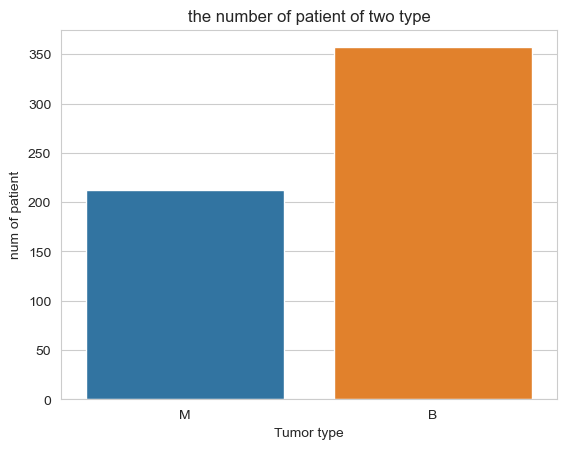

In [6]:
sns.countplot(x="diagnosis", data=data)      #用数数图画
plt.xlabel("Tumor type")
plt.ylabel("num of patient")
plt.title("the number of patient of two type")
plt.show()

### 1.2 同一个图中画出B,M组area_mean的箱体图+stripplot

C:\Softwares\stem_softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Softwares\stem_softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


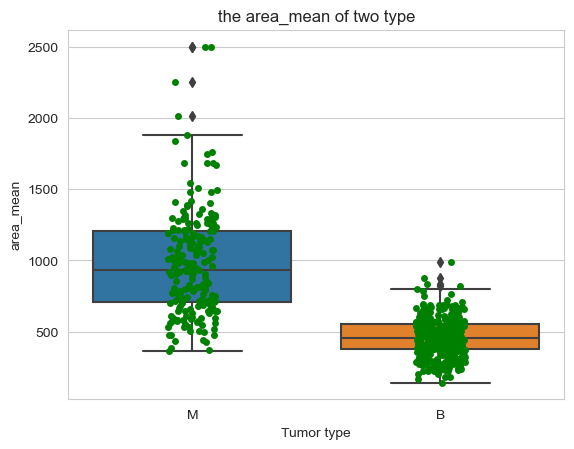

In [7]:
sns.boxplot(y="area_mean", data=data, x="diagnosis")              #先画箱体图
sns.stripplot(y="area_mean", data=data, color="g", x="diagnosis")  #再加上散点
plt.xlabel("Tumor type")
plt.ylabel("area_mean")
plt.title("the area_mean of two type")
plt.show()

### 1.3 分别画出B,M组的area_mean直方图

C:\Softwares\stem_softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Softwares\stem_softwares\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


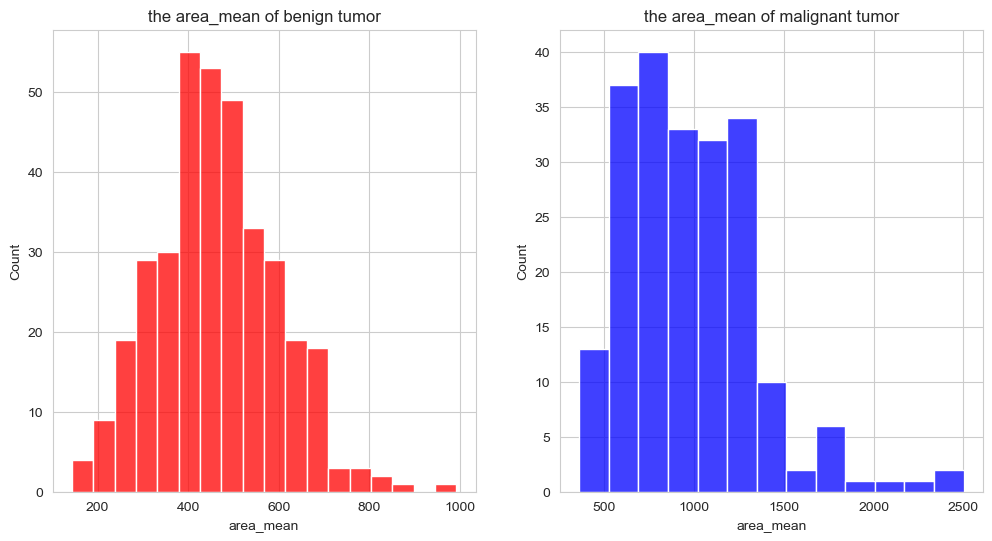

In [8]:
df = pd.DataFrame(data)
sns.set_style("whitegrid") #设置风格

fig, ax = plt.subplots(1, 2, figsize=(12,6))                      #设置子图，下面画图
sns.histplot(data=df[df["diagnosis"]=="B"], x="area_mean", color="r", ax=ax[0]) #筛选diagnosis中为B的数据，记录在子图1中
ax[0].set_title("the area_mean of benign tumor")

sns.histplot(data=df[df["diagnosis"]=="M"], x="area_mean", color="b", ax=ax[1]) #筛选M，记录在子图2中
ax[1].set_title("the area_mean of malignant tumor")

plt.show()

### 1.4 通过sm.qqplot, 评价B,M组的area_mean的正态性

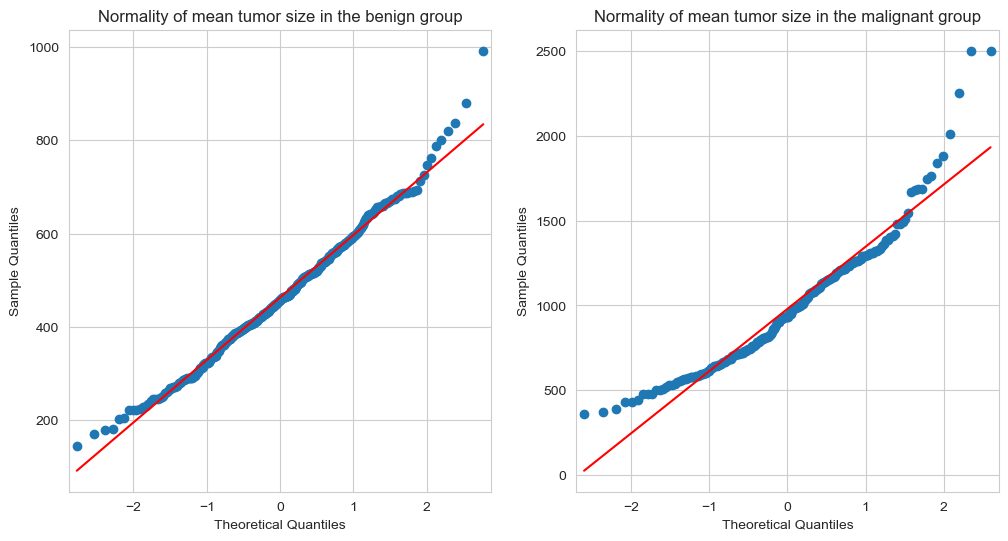

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))           #设置子图
sm.qqplot(df[df["diagnosis"]=="B"]["area_mean"], stats.norm, line="s", ax=ax[0])  #筛选diagnosis中为B的数据，记录在子图1
ax[0].set_title("Normality of mean tumor size in the benign group")

sm.qqplot(df[df["diagnosis"]=="M"]["area_mean"], stats.norm, line="s", ax=ax[1])  #筛选M，记录在子图2
ax[1].set_title("Normality of mean tumor size in the malignant group")

plt.show()

## 2 计算B,M组的样本各种值

In [10]:
df_use = df.loc[:,["area_mean","diagnosis"]]
df_use1 = df_use.groupby("diagnosis") #去掉表头，不知道为什么表头的str一直报错

In [11]:
#样本均值
sample_mean = df_use1.mean()
print(sample_mean)

            area_mean
diagnosis            
B          462.790196
M          978.376415


In [12]:
#样本方差
sample_variance = df_use1.var(ddof=1) #自由度为n-1，为样本方差
print(sample_variance)

               area_mean
diagnosis               
B           18033.030100
M          135378.355365


In [13]:
#样本标准差,直接开根号即可
sample_standard_variance = sample_variance**0.5
print(sample_standard_variance)

            area_mean
diagnosis            
B          134.287118
M          367.937978


In [14]:
#样本变异系数，直接除就可以得到，最后是百分数值
sample_CoV = sample_standard_variance / sample_mean * 100
print(sample_CoV)

           area_mean
diagnosis           
B          29.016846
M          37.606996


In [15]:
#样本偏度
sample_skew = df_use1.skew()
print(sample_skew)

           area_mean
diagnosis           
B           0.342265
M           1.117668


In [16]:
#样本峰度
sample_kurtosis = df_use1.apply(lambda x: x.kurt())   #groupby之后没有原生的kurt函数，故定义一个匿名函数
print(sample_kurtosis)

           area_mean
diagnosis           
B           0.309498
M           2.306042


In [17]:
#样本IQR
q3 = df_use1.quantile(q=0.75)
q1 = df_use1.quantile(q=0.25)
IQR = q3 - q1
print(IQR)

           area_mean
diagnosis           
B             172.90
M             498.45
